Observed Frequencies of Admittance by Gender:

              admitted  rejected  row_total
Male              1198      1493       2691
Female             557      1278       1835
column_total      1755      2771       4526

Manually calculated Chi-Squared statistic =  92.2053

scipy.stats Chi-Sqaured statistic: 92.20528041152764
P-value = 7.359214538333194e-20

The observed frequencies are unlikely to have occurred under the null hypothesis (p <= 0.05). Admittance/rejection is significantly related to gender.

Kramer's V = 0.2018531910648242


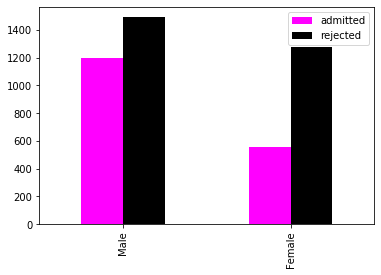

In [15]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import math

# data on UCBA admissions obtained from 'https://forge.scilab.org/index.php/p/rdataset/source/tree/master/csv/datasets/UCBAdmissions.csv'

# importing and subsetting the data

dframe = pd.read_csv('UCBAdmissions.csv')
dframe = dframe.drop(columns = 'Unnamed: 0')

male = dframe[dframe.Gender == 'Male']

female = dframe[dframe.Gender == 'Female']

female_acc = female[female.Admit == 'Admitted']

male_acc = male[male.Admit == 'Admitted']

female_rej = female[female.Admit == 'Rejected']

male_rej = male[male.Admit == 'Rejected']

male_admit_prop = [sum(male_acc['Freq']), sum(male_rej['Freq'])]

female_admit_prop = [sum(female_acc['Freq']), sum(female_rej['Freq'])]

# creating a dataframe of the observed frequencies of admittance by gender

prop = pd.DataFrame([male_admit_prop, female_admit_prop], columns = ['admitted', 'rejected'])
prop.index = ['Male', 'Female']
prop.loc['column_total']= prop.sum(numeric_only=True, axis=0)
prop.loc[:,'row_total'] = prop.sum(numeric_only=True, axis=1)

print('Observed Frequencies of Admittance by Gender:')
print()
print(prop)
print()

# calculating the expected frequencies

grand = prop.row_total[2]

male_exp = [(prop.admitted[2]*prop.row_total[0])/grand, (prop.rejected[2]*prop.row_total[0])/grand]

female_exp = [(prop.admitted[2]*prop.row_total[1])/grand, (prop.rejected[2]*prop.row_total[1])/grand]

exp = pd.DataFrame([male_exp, female_exp], columns = ['admitted', 'rejected'])
exp.index = ['Male', 'Female']

# calculating the chi-squared statistic

chi_square = (prop.admitted[0]-exp.admitted[0])**2/exp.admitted[0] + (prop.rejected[0]-exp.rejected[0])**2/exp.rejected[0] + (prop.admitted[1]-exp.admitted[1])**2/exp.admitted[1] + (prop.rejected[1]-exp.rejected[1])**2/exp.rejected[1]

print('Manually calculated Chi-Squared statistic = ', round(chi_square,4))

# checking results with scipy.stats

prop2 = prop.drop(index = 'column_total', columns = 'row_total')

result = scipy.stats.chisquare(prop2, exp, axis = None)

print()
print('scipy.stats Chi-Sqaured statistic:', result[0])
print('P-value =', result[1])
print()

if result[1] <= 0.05:
    print('The observed frequencies are unlikely to have occurred under the null hypothesis (p <= 0.05). Admittance/rejection is significantly related to gender.')
    
else:
    print('The observed frequencies are likely to have occurred under the null hypothesis (p > 0.05). Admittance/rejection is NOT significantly related to gender.')
    
# plotting the data

prop2.plot.bar(color= ['magenta', 'black'])

# calculating effect size

n = prop.at['column_total', 'row_total']
kramers_phi = math.sqrt(chi_square/n*2)
print()

print("Kramer's V =", kramers_phi)

4526